In [1]:
# Gerekli kütüphanelerin yüklenmesi
#!pip install scikit-learn
#!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Veri setinin okunması
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Eksik değerlerin kontrol edilmesi
print(data.isnull().sum())

# Kategorik ve sayısal sütunların ayrılması
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Sayısal verilerin ölçeklendirilmesi
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Veri setinin bağımlı ve bağımsız değişkenlere ayrılması
X = data.drop('target', axis=1)
y = data['target']

# Eğitim ve test verilerinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


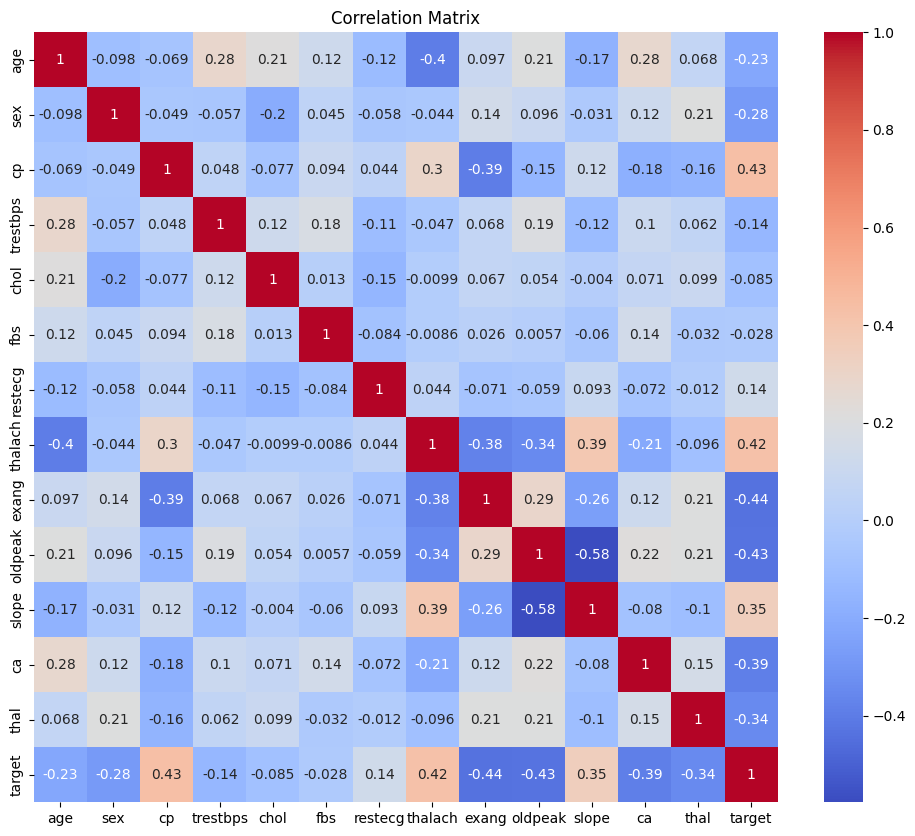

In [3]:
# Korelasyon matrisi
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Logistic Regression Accuracy: 0.8524590163934426
[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



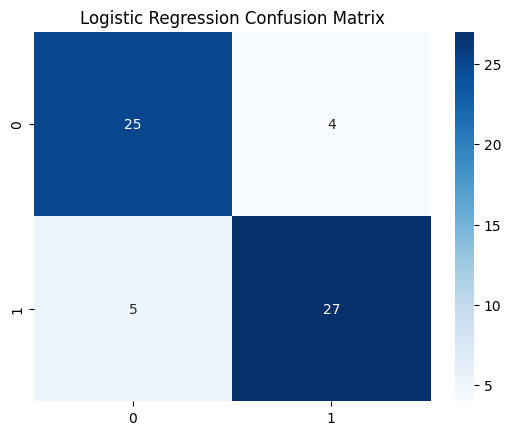

In [4]:
# Logistic Regression modeli
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Model değerlendirme
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


KNN Accuracy: 0.8688524590163934
[[24  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



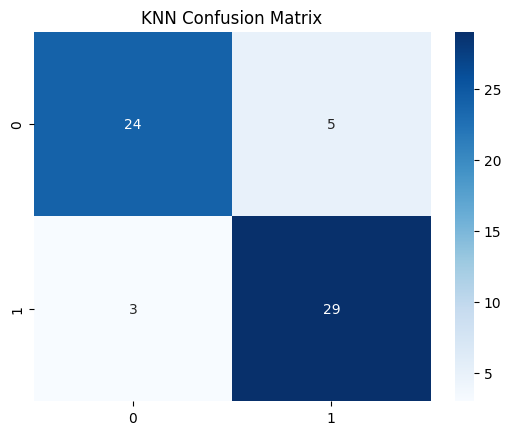

In [5]:
# KNN modeli
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Model değerlendirme
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()


SVM Accuracy: 0.8688524590163934
[[24  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



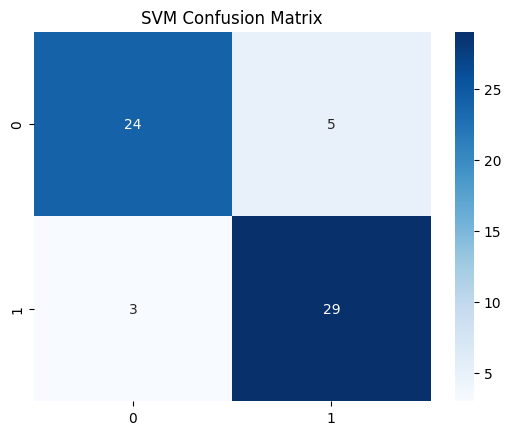

In [6]:
# SVM modeli
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Model değerlendirme
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()


Decision Tree Accuracy: 0.8360655737704918
[[26  3]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



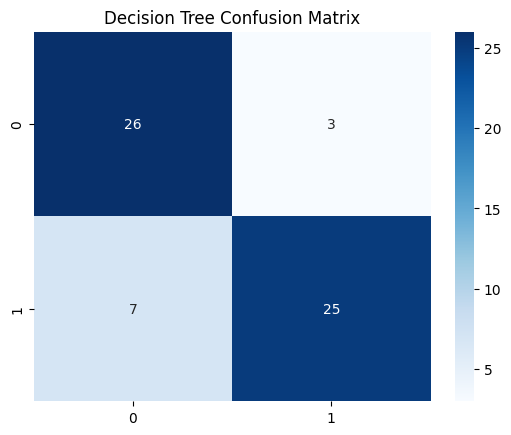

In [7]:
# Decision Tree modeli
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Model değerlendirme
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.8688524590163934
[[24  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



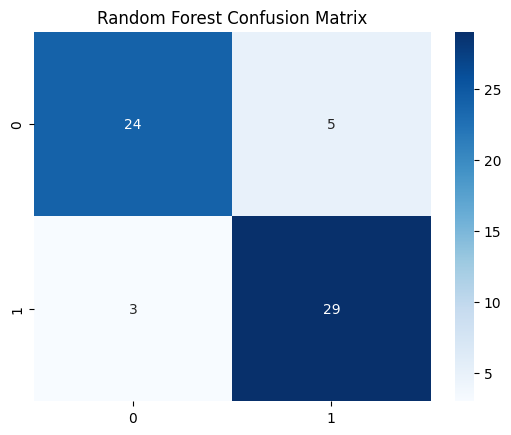

In [8]:
# Random Forest modeli
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model değerlendirme
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()


XGBoost Accuracy: 0.819672131147541
[[25  4]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



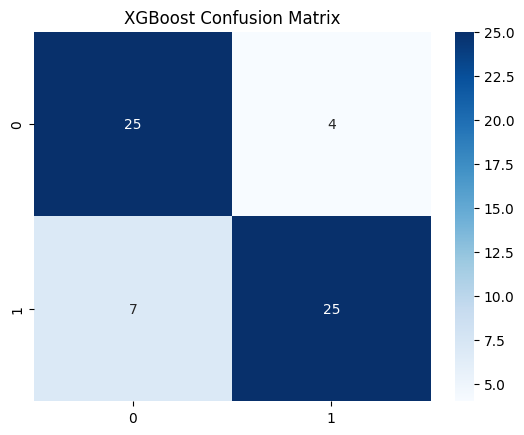

In [9]:
# XGBoost modeli
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Model değerlendirme
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='Blues', fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()


ANN Accuracy: 0.8524590163934426
[[24  5]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


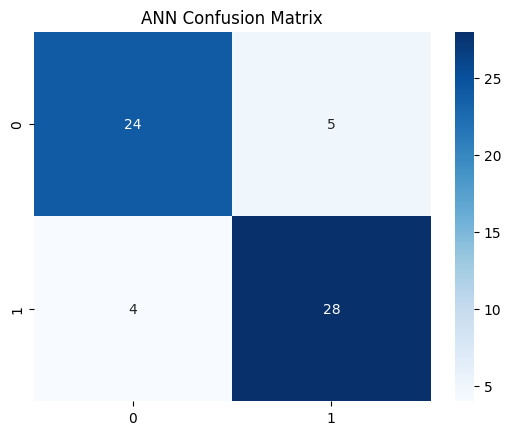

In [10]:
# ANN modeli
ann_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42)
ann_model.fit(X_train, y_train)
ann_pred = ann_model.predict(X_test)

# Model değerlendirme
print("ANN Accuracy:", accuracy_score(y_test, ann_pred))
print(confusion_matrix(y_test, ann_pred))
print(classification_report(y_test, ann_pred))

# Confusion Matrix görselleştirme
sns.heatmap(confusion_matrix(y_test, ann_pred), annot=True, cmap='Blues', fmt='d')
plt.title('ANN Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import roc_curve, auc

# ROC ve AUC fonksiyonları için yardımcı fonksiyon
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


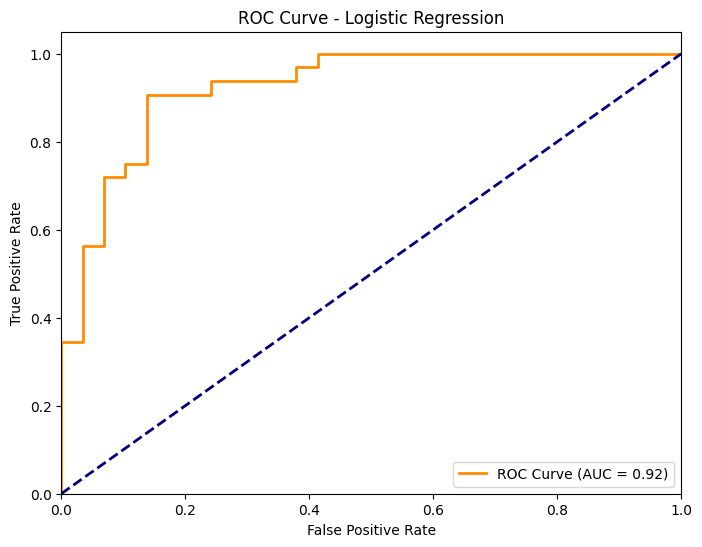

In [12]:
# Logistic Regression ROC Eğrisi
log_pred_proba = log_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, log_pred_proba, 'Logistic Regression')


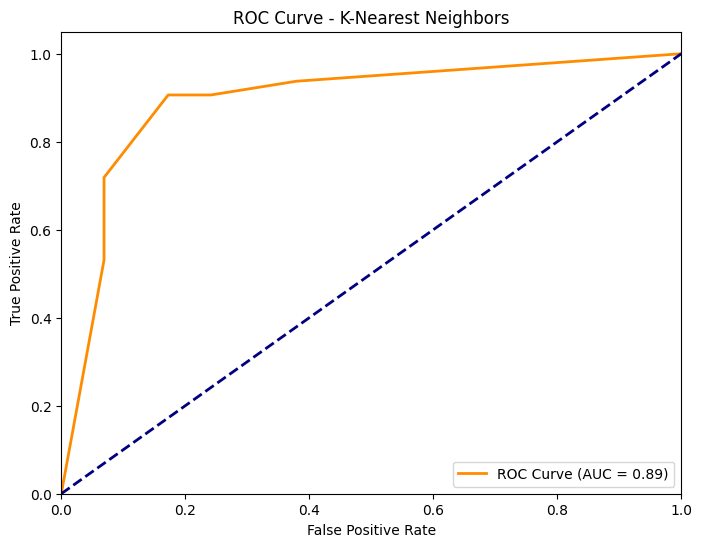

In [13]:
# KNN ROC Eğrisi
knn_pred_proba = knn_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, knn_pred_proba, 'K-Nearest Neighbors')


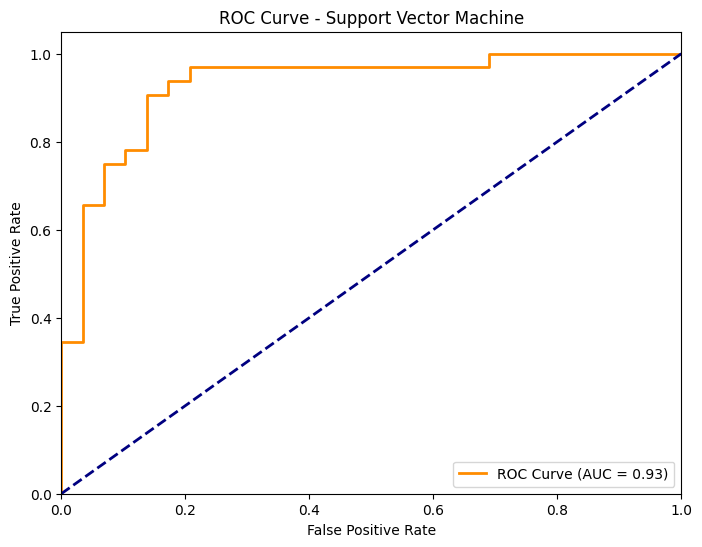

In [14]:
# SVM modeli güncelleme (probability=True)
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, svm_pred_proba, 'Support Vector Machine')


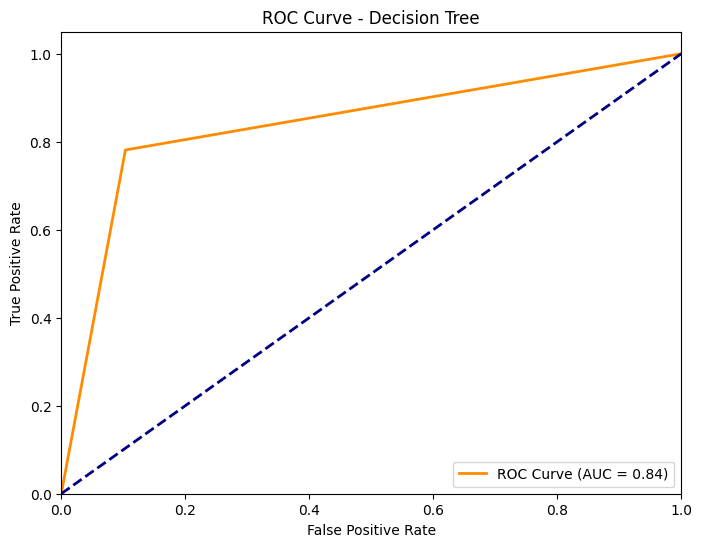

In [15]:
# Decision Tree ROC Eğrisi
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, dt_pred_proba, 'Decision Tree')


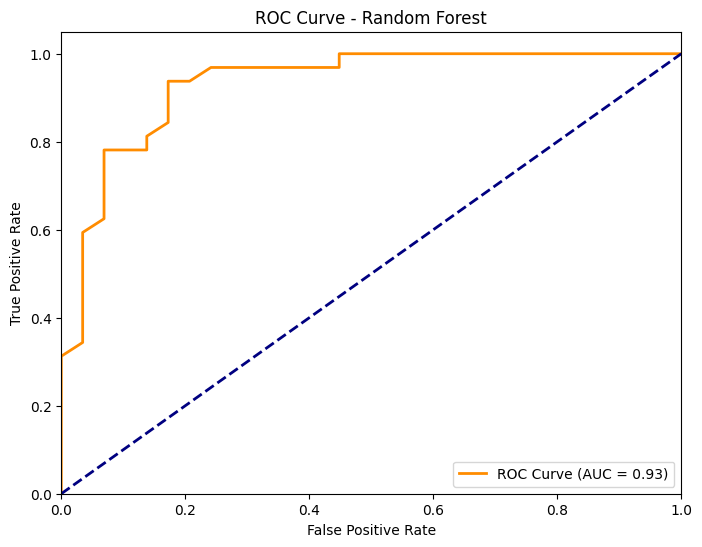

In [16]:
# Random Forest ROC Eğrisi
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, rf_pred_proba, 'Random Forest')


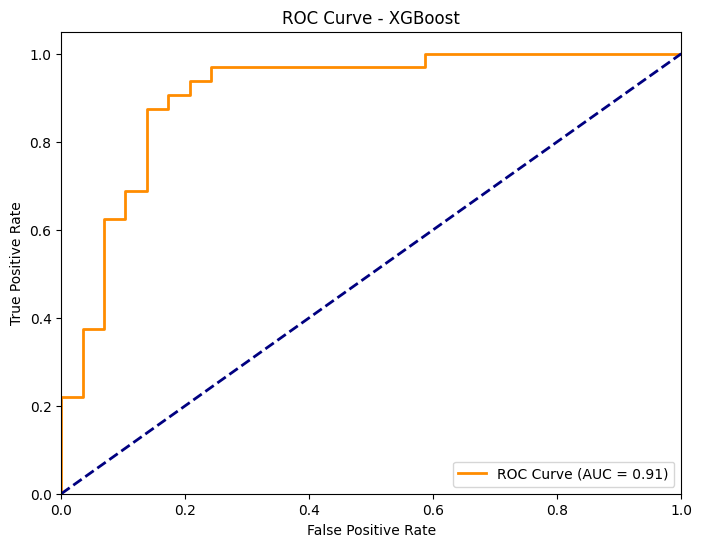

In [17]:
# XGBoost ROC Eğrisi
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, xgb_pred_proba, 'XGBoost')


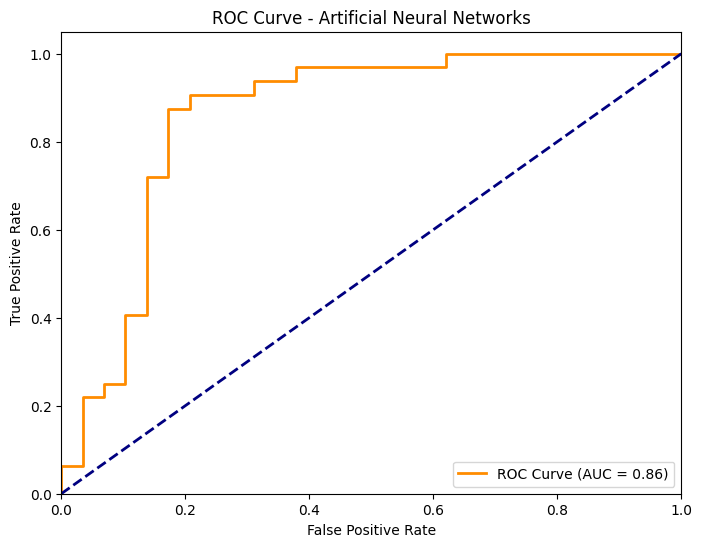

In [18]:
# ANN ROC Eğrisi
ann_pred_proba = ann_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, ann_pred_proba, 'Artificial Neural Networks')


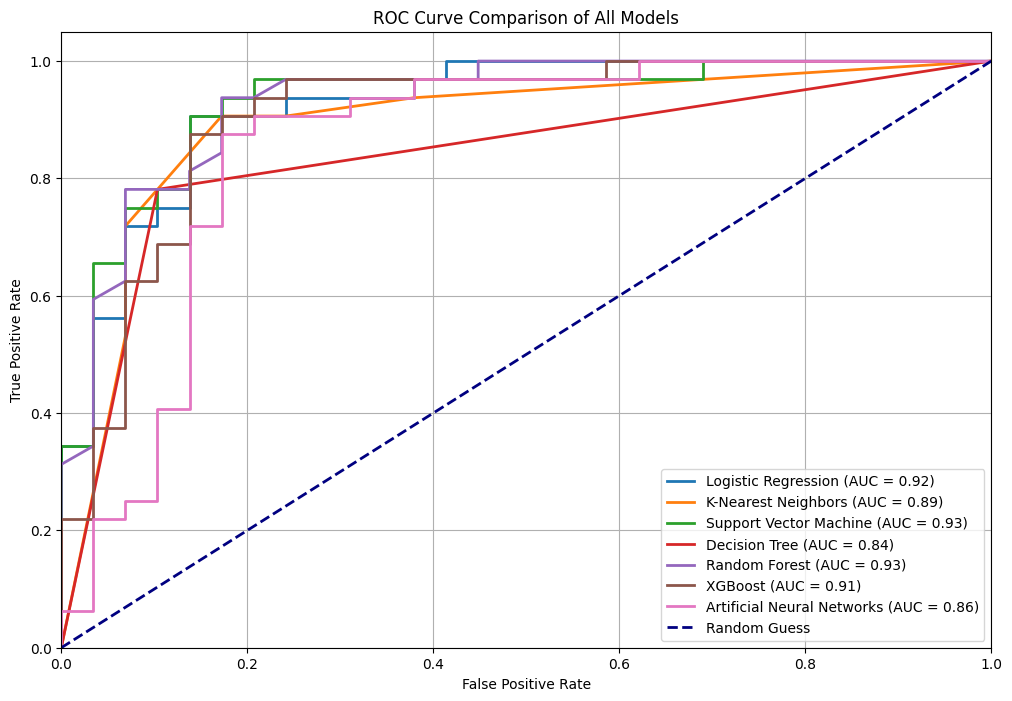

In [19]:
from sklearn.metrics import roc_curve, auc

# Tüm modellerin ROC eğrilerini aynı grafik üzerinde çizme fonksiyonu
def plot_all_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for model_name, model in models.items():
        # Modellerin tahmin olasılıklarını elde et
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # ROC eğrisini çiz
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Rastgele tahmin eğrisi (diagonal çizgi)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    
    # Grafik detayları
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison of All Models')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Modellerin isimleri ve nesneleri
models = {
    'Logistic Regression': log_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Artificial Neural Networks': ann_model
}

# Tüm modeller için ROC eğrilerini aynı grafikte göster
plot_all_roc_curves(models, X_test, y_test)


In [20]:
from sklearn.model_selection import cross_val_score

# Modellerin Cross-Validation değerlendirmesi
def evaluate_models_with_cross_validation(models, X, y, cv=5):
    results = {}

    for model_name, model in models.items():
        # 5-Fold Cross-Validation ile modeli değerlendir
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        results[model_name] = scores
        print(f'{model_name} Cross-Validation Scores: {scores}')
        print(f'{model_name} Average Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')
        print('-' * 50)

    return results

# Modellerin isimleri ve nesneleri
models = {
    'Logistic Regression': log_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Artificial Neural Networks': ann_model
}

# Cross-validation sonuçlarını değerlendir
cross_val_results = evaluate_models_with_cross_validation(models, X, y, cv=5)


Logistic Regression Cross-Validation Scores: [0.81967213 0.8852459  0.85245902 0.86666667 0.75      ]
Logistic Regression Average Accuracy: 0.8348 ± 0.0475
--------------------------------------------------
K-Nearest Neighbors Cross-Validation Scores: [0.78688525 0.80327869 0.80327869 0.85       0.73333333]
K-Nearest Neighbors Average Accuracy: 0.7954 ± 0.0375
--------------------------------------------------
Support Vector Machine Cross-Validation Scores: [0.81967213 0.8852459  0.85245902 0.83333333 0.75      ]
Support Vector Machine Average Accuracy: 0.8281 ± 0.0448
--------------------------------------------------
Decision Tree Cross-Validation Scores: [0.75409836 0.86885246 0.72131148 0.7        0.71666667]
Decision Tree Average Accuracy: 0.7522 ± 0.0609
--------------------------------------------------
Random Forest Cross-Validation Scores: [0.85245902 0.85245902 0.80327869 0.8        0.76666667]
Random Forest Average Accuracy: 0.8150 ± 0.0332
----------------------------------

C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Artificial Neural Networks Cross-Validation Scores: [0.81967213 0.80327869 0.80327869 0.75       0.73333333]
Artificial Neural Networks Average Accuracy: 0.7819 ± 0.0338
--------------------------------------------------


C:\Users\MKOTAN\anaconda3\envs\env_nlp\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest (GridSearch): {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy (GridSearch): 0.8266156462585034
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best Cross-Validation Accuracy (Random Search): 0.8139455782312925
                                Model  Accuracy
0         Random Forest (Unoptimized)  0.868852
1        Random Forest (GridSearchCV)  0.852459
2  Random Forest (RandomizedSearchCV)  0.868852


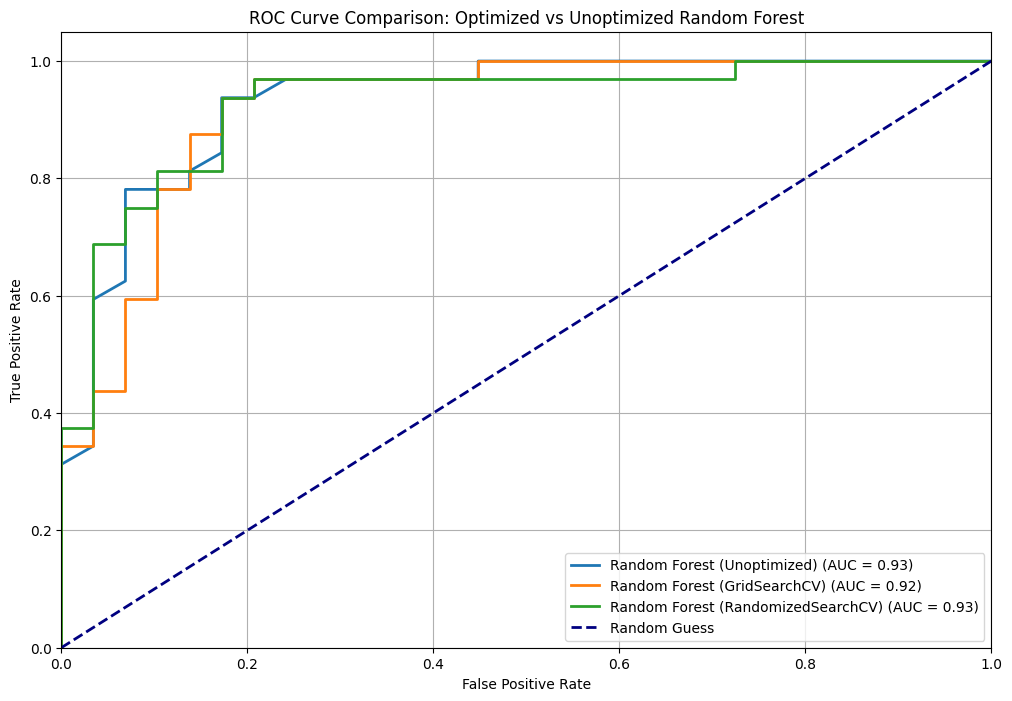

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest GridSearchCV ile hiperparametre optimizasyonu
def optimize_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
    
    grid_search.fit(X_train, y_train)
    
    print("Best Parameters for Random Forest (GridSearch):", grid_search.best_params_)
    print("Best Cross-Validation Accuracy (GridSearch):", grid_search.best_score_)
    
    return grid_search.best_estimator_

# Random Forest RandomizedSearchCV ile hiperparametre optimizasyonu
def optimize_random_forest_random_search(X_train, y_train):
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                       param_distributions=param_dist,
                                       n_iter=20,  # Toplam 20 farklı kombinasyon denenecek
                                       cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
    
    random_search.fit(X_train, y_train)
    
    print("Best Parameters from Randomized Search:", random_search.best_params_)
    print("Best Cross-Validation Accuracy (Random Search):", random_search.best_score_)
    
    return random_search.best_estimator_

# Optimize edilmiş modelleri oluşturma
optimized_rf_model = optimize_random_forest(X_train, y_train)
optimized_rf_model_random_search = optimize_random_forest_random_search(X_train, y_train)

# Optimize edilmemiş Random Forest modeli ile değerlendirme
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# GridSearchCV ile optimize edilmiş modelin değerlendirilmesi
rf_optimized_pred = optimized_rf_model.predict(X_test)
rf_optimized_accuracy = accuracy_score(y_test, rf_optimized_pred)

# RandomizedSearchCV ile optimize edilmiş modelin değerlendirilmesi
rf_random_search_pred = optimized_rf_model_random_search.predict(X_test)
rf_random_search_accuracy = accuracy_score(y_test, rf_random_search_pred)

# Sonuçları karşılaştırmalı olarak sunma
comparison_results = pd.DataFrame({
    'Model': ['Random Forest (Unoptimized)', 'Random Forest (GridSearchCV)', 'Random Forest (RandomizedSearchCV)'],
    'Accuracy': [rf_accuracy, rf_optimized_accuracy, rf_random_search_accuracy]
})

print(comparison_results)

# Optimize edilmemiş ve optimize edilmiş modellerin ROC eğrilerinin karşılaştırılması
plt.figure(figsize=(12, 8))

# Optimize edilmemiş modelin ROC eğrisi
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Random Forest (Unoptimized) (AUC = {roc_auc:.2f})')

# GridSearch ile optimize edilmiş modelin ROC eğrisi
rf_optimized_proba = optimized_rf_model.predict_proba(X_test)[:, 1]
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, rf_optimized_proba)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
plt.plot(fpr_optimized, tpr_optimized, lw=2, label=f'Random Forest (GridSearchCV) (AUC = {roc_auc_optimized:.2f})')

# RandomizedSearch ile optimize edilmiş modelin ROC eğrisi
rf_random_search_proba = optimized_rf_model_random_search.predict_proba(X_test)[:, 1]
fpr_random_search, tpr_random_search, _ = roc_curve(y_test, rf_random_search_proba)
roc_auc_random_search = auc(fpr_random_search, tpr_random_search)
plt.plot(fpr_random_search, tpr_random_search, lw=2, label=f'Random Forest (RandomizedSearchCV) (AUC = {roc_auc_random_search:.2f})')

# ROC eğrisi görselleştirme detayları
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Optimized vs Unoptimized Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()
